Formato: None, Tamanho: (960, 538), Modo: L


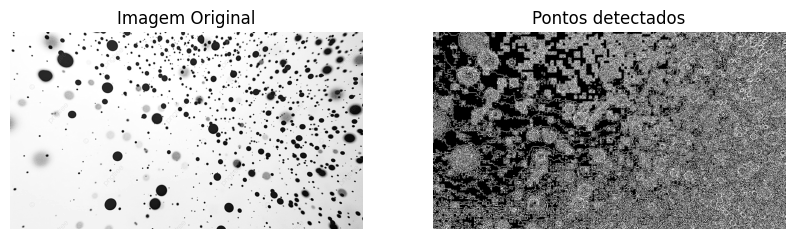

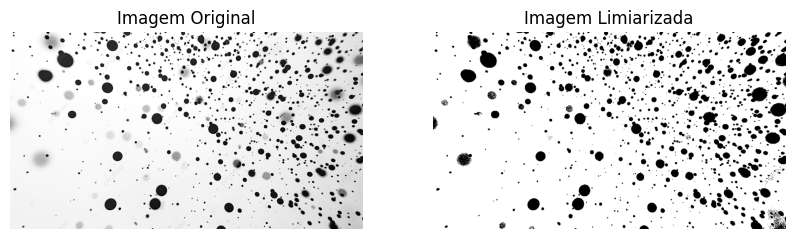

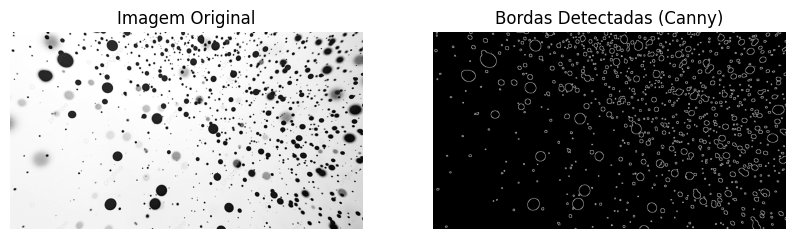

Formato: None, Tamanho: (400, 480), Modo: L


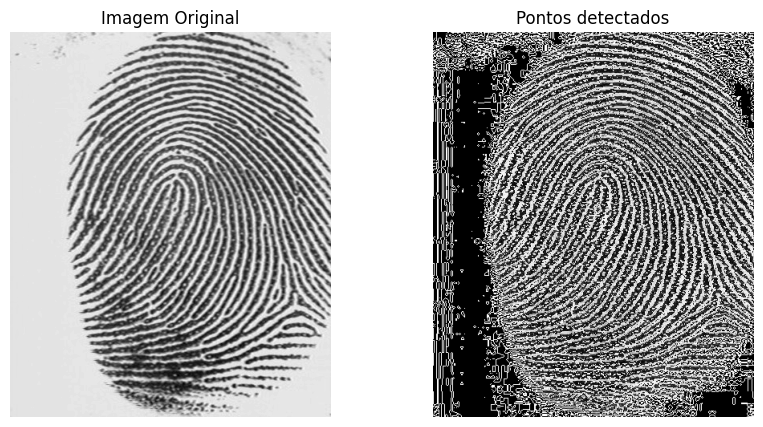

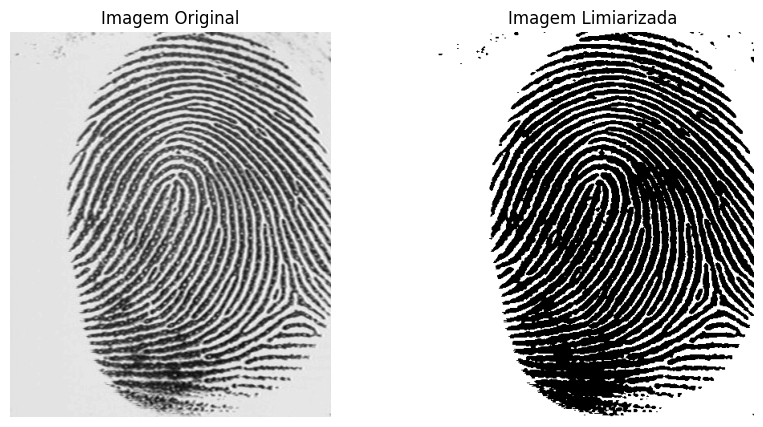

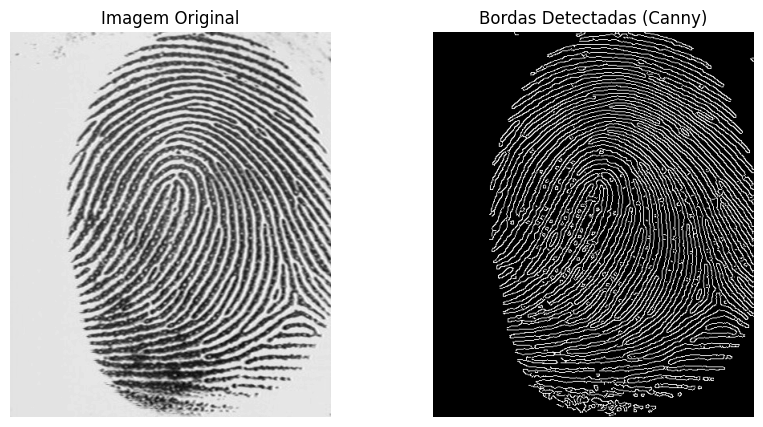

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import cv2

def abrir_imagem(caminho):
    img = Image.open(caminho).convert('L')  # Converter para escala de cinza
    print(f"Formato: {img.format}, Tamanho: {img.size}, Modo: {img.mode}")
    return img, np.array(img)

def plotar_imagem(img_original, img_filtrada, titulo_original, titulo_filtrada):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(img_original, cmap='gray')
    ax[0].set_title(titulo_original)
    ax[0].axis('off')
    ax[1].imshow(img_filtrada, cmap='gray')
    ax[1].set_title(titulo_filtrada)
    ax[1].axis('off')
    plt.show()

# 1. Implementar detector de ponto conforme slide 17
def filtro_laplaciano(img):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    img_filtrada = convolve(img, kernel)
    img_filtrada = ((img_filtrada - img_filtrada.min()) / (img_filtrada.max() - img_filtrada.min())) * 255
    return img_filtrada.astype(np.uint8)

# 2. Implementar limiarização
def limiarizacao(img, limiar):
    _, img_limiarizada = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
    return img_limiarizada

# 3. Implementar detector de bordas Canny
def detector_bordas_canny(img, t1, t2):
    img_bordas = cv2.Canny(img, t1, t2)
    return img_bordas

# 3.1 Aplicar filtro de borramento gaussiano
def filtro_borramento_gaussiano(img, sigma):
    return cv2.GaussianBlur(img, (5, 5), sigma)

def main():
    imagens = ['pontos.jpg', 'fingerprint.tif']

    # Exemplo de limiar
    limiar = 200

    # Parâmetros para o detector de bordas Canny
    t1 = 100
    t2 = 200

    for caminho in imagens:
        img_original, img_cv = abrir_imagem(caminho)

        # 1. Detector de ponto
        img_filtro_laplaciano = filtro_laplaciano(img_cv)
        plotar_imagem(img_original, img_filtro_laplaciano, "Imagem Original", "Pontos detectados")

        # 2. Limiarização
        img_limiarizada = limiarizacao(img_cv, limiar)
        plotar_imagem(img_original, img_limiarizada, "Imagem Original", "Imagem Limiarizada")

        # 3. Detector de bordas Canny
        img_borrada = filtro_borramento_gaussiano(img_cv, sigma=1)
        img_bordas = detector_bordas_canny(img_borrada, t1, t2)
        plotar_imagem(img_original, img_bordas, "Imagem Original", "Bordas Detectadas (Canny)")

if __name__ == "__main__":
    main()
